In [108]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pygwalker as pyg
from ydata_profiling import ProfileReport

# Data Importing

In [109]:
data1=pd.read_csv(r'G:\Data Science Course Machinfy\data\ML.csv')
data2=pd.read_csv(r'G:\Data Science Course Machinfy\data\MLtag.csv')

# Copy Data

In [62]:
ml1=data1.copy()
ml2=data2.copy()

In [110]:
ml1.head(3)

,typeofaction,guiltyid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,7/19/2019 14:40,1,type1
1,cash-in,30105,8692,494528,5/17/2019 14:57,1,type1
2,cash-in,30105,60094,494528,7/20/2019 13:20,1,type1


In [64]:
ml1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   date           2340 non-null   object
 5   isfraud        2340 non-null   int64 
 6   typeoffraud    2340 non-null   object
dtypes: int64(4), object(3)
memory usage: 128.1+ KB


In [111]:
ml2.head(3)

,guiltyid,levelofcrime,typeofcrime
0,30105,head,type1
1,80740,head,type1
2,92735,head,type1


# Data PreProcessing

In [66]:
ml1.isna().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64

In [67]:
ml2.isna().sum()

guiltyid        0
levelofcrime    0
typeofcrime     0
dtype: int64

In [68]:
ml1.describe()

,sourceid,destinationid,amountofmoney,isfraud
count,2340.000000,2340.000000,2.340000e+03,2340.000000
mean,49111.255128,52257.918803,2.508583e+06,0.597863
std,29614.440603,28988.847246,2.560434e+06,0.490434
min,61.000000,53.000000,1.333200e+04,0.000000
25%,24033.000000,28046.000000,3.359140e+05,0.000000
50%,46632.500000,52748.500000,1.162354e+06,1.000000
75%,75107.000000,78030.000000,4.686559e+06,1.000000
max,100000.000000,99950.000000,7.952497e+06,1.000000


In [69]:
ml1.describe(include='object')

,typeofaction,date,typeoffraud
count,2340,2340,2340
unique,2,2309,4
top,transfer,5/12/2019 14:02,none
freq,1580,2,941


In [70]:
ml2.describe()

,guiltyid
count,1484.000000
mean,49331.799865
std,29127.196075
min,185.000000
25%,23796.750000
50%,49980.000000
75%,74511.000000
max,100000.000000


In [71]:
ml2.describe(include='object')

,levelofcrime,typeofcrime
count,1484,1484
unique,2,5
top,colleague,type3
freq,1367,539


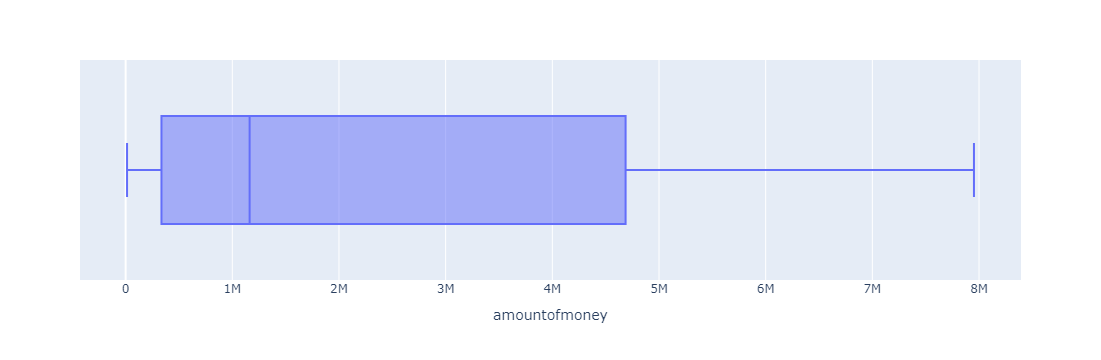

In [72]:
fig=px.box(ml1,x='amountofmoney')
fig.show()

In [112]:
ml1 = ml1.rename(columns={'sourceid': 'guiltyid'})

In [115]:
ml1.head(3)

,typeofaction,guiltyid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,7/19/2019 14:40,1,type1
1,cash-in,30105,8692,494528,5/17/2019 14:57,1,type1
2,cash-in,30105,60094,494528,7/20/2019 13:20,1,type1


In [114]:
ml2.head(2)

,guiltyid,levelofcrime,typeofcrime
0,30105,head,type1
1,80740,head,type1


In [116]:
ml1.columns

Index(['typeofaction', 'guiltyid', 'destinationid', 'amountofmoney', 'date',
       'isfraud', 'typeoffraud'],
      dtype='object')

In [77]:
#profile=ProfileReport(ml1)

In [78]:
#profile.to_notebook_iframe()

In [79]:
#profile2=ProfileReport(ml2)

In [80]:
#profile2.to_notebook_iframe()

# Merge Data

In [160]:
merged=pd.merge(ml1,ml2,how='inner',on='guiltyid')

In [161]:
merged.shape

(1507, 9)

In [162]:
merged.isna().sum()

typeofaction     0
guiltyid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
levelofcrime     0
typeofcrime      0
dtype: int64

In [120]:
merged.head(5)

,typeofaction,guiltyid,destinationid,amountofmoney,date,isfraud,typeoffraud,levelofcrime,typeofcrime
0,cash-in,30105,28942,494528,7/19/2019 14:40,1,type1,head,type1
1,cash-in,30105,8692,494528,5/17/2019 14:57,1,type1,head,type1
2,cash-in,30105,60094,494528,7/20/2019 13:20,1,type1,head,type1
3,cash-in,30105,20575,494528,7/3/2019 14:15,1,type1,head,type1
4,cash-in,30105,45938,494528,5/26/2019 10:40,1,type1,head,type1


# Seperate Date to TIME , YEAR , MONTHS , QUARTER

In [121]:
merged['date']=pd.to_datetime(merged['date'])

In [122]:
merged['Date'] = merged['date'].dt.date
merged['time'] = merged['date'].dt.time
merged['year'] = merged['date'].dt.year
merged['month'] = merged['date'].dt.month
merged['quarter'] = merged['date'].dt.to_period('Q').dt.strftime('Q%q')

In [127]:
merged.head(5)

,typeofaction,guiltyid,destinationid,amountofmoney,date,isfraud,typeoffraud,levelofcrime,typeofcrime,Date,time,year,month,quarter
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1,head,type1,2019-07-19,02:40 PM,2019,7,Q3
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1,head,type1,2019-05-17,02:57 PM,2019,5,Q2
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1,head,type1,2019-07-20,01:20 PM,2019,7,Q3
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1,head,type1,2019-07-03,02:15 PM,2019,7,Q3
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1,head,type1,2019-05-26,10:40 AM,2019,5,Q2


In [128]:
merged['time'] = merged['date'].dt.strftime('%I:%M %p')

In [129]:
merged.head(5)

,typeofaction,guiltyid,destinationid,amountofmoney,date,isfraud,typeoffraud,levelofcrime,typeofcrime,Date,time,year,month,quarter
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1,head,type1,2019-07-19,02:40 PM,2019,7,Q3
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1,head,type1,2019-05-17,02:57 PM,2019,5,Q2
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1,head,type1,2019-07-20,01:20 PM,2019,7,Q3
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1,head,type1,2019-07-03,02:15 PM,2019,7,Q3
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1,head,type1,2019-05-26,10:40 AM,2019,5,Q2


# top 10 guiltyid , destinationid

In [163]:
guiltyid_value_counts  =  merged['guiltyid'].value_counts()
top_ten_guiltyid_modes = guiltyid_value_counts.head(10)
top_ten_guiltyid_modes

guiltyid
4161     30
39284    29
82688    26
92735    25
37177    25
13919    24
69208    24
24041    23
30965    22
72032    21
Name: count, dtype: int64

In [170]:
guiltyid_value_counts  =  ml1['guiltyid'].value_counts()
top_ten_guiltyid_modes = guiltyid_value_counts.head(10)
top_ten_guiltyid_modes

guiltyid
4161     30
39284    29
96057    26
82688    26
92735    25
37177    25
13919    24
69208    24
24041    23
30965    22
Name: count, dtype: int64

In [167]:
destinationid_value_counts  =  merged['destinationid'].value_counts()
top_ten_destinationid_modes = destinationid_value_counts.head(10)
top_ten_destinationid_modes

destinationid
86903    28
42168    28
83790    28
95498    27
77952    26
61346    25
90946    24
83988    24
59470    23
51149    22
Name: count, dtype: int64

In [171]:
ml1['guiltyid'].value_counts()

guiltyid
4161     30
39284    29
96057    26
82688    26
92735    25
         ..
25847     1
55321     1
51984     1
45257     1
26390     1
Name: count, Length: 1749, dtype: int64

In [172]:
ml2['guiltyid'].value_counts()

guiltyid
7654     3
28680    2
52483    2
71881    2
82726    2
        ..
34544    1
49051    1
71373    1
16595    1
89938    1
Name: count, Length: 1442, dtype: int64

In [182]:
merged[merged['guiltyid']==7654].value_counts()

typeofaction  guiltyid  destinationid  amountofmoney  date             isfraud  typeoffraud  levelofcrime  typeofcrime
transfer      7654      13064          1367414        4/1/2019 12:59   0        none         colleague     type1          1
                                                                                                           type2          1
                                                                                             head          type2-2        1
                        86315          7422956        3/17/2019 12:02  1        type2        colleague     type1          1
                                                                                                           type2          1
                                                                                             head          type2-2        1
Name: count, dtype: int64

In [183]:
ml1[ml1['guiltyid']==7654].value_counts()

typeofaction  guiltyid  destinationid  amountofmoney  date             isfraud  typeoffraud
transfer      7654      13064          1367414        4/1/2019 12:59   0        none           1
                        86315          7422956        3/17/2019 12:02  1        type2          1
Name: count, dtype: int64

In [184]:
ml2[ml2['guiltyid']==7654].value_counts()

guiltyid  levelofcrime  typeofcrime
7654      colleague     type1          1
                        type2          1
          head          type2-2        1
Name: count, dtype: int64

In [176]:
ml2[ml2['guiltyid']==7654].isin(ml1['guiltyid'])

,guiltyid,levelofcrime,typeofcrime
82,False,False,False
471,False,False,False
871,False,False,False


In [177]:
7654 in ml1['guiltyid'].values

True

In [179]:
index_of_7654_in_ml1 = ml1[ml1['guiltyid'] == 7654].index
index_of_7654_in_ml1.tolist()  # Convert to list for easier viewing

[781, 2237]

# EDA

<Axes: xlabel='amountofmoney', ylabel='typeofaction'>

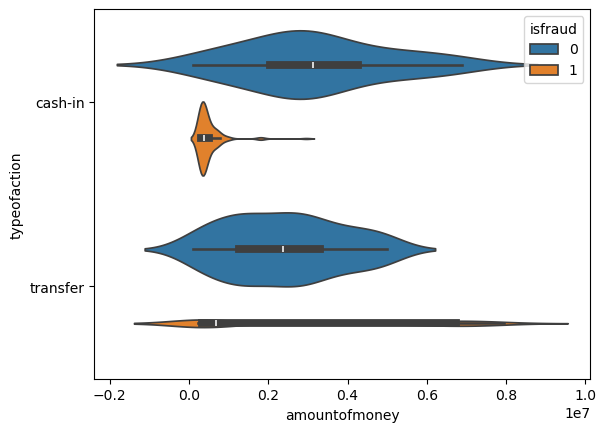

In [93]:
sns.violinplot(x='amountofmoney',y='typeofaction',hue='isfraud',data=merged)

# cash has amountofmoney more than transfer
# cash has is fraud more than transfer

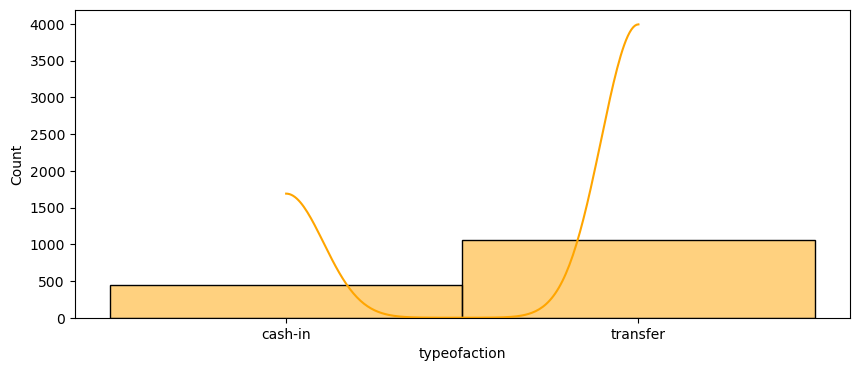

In [94]:
plt.figure(figsize=(10, 4))
sns.histplot(merged['typeofaction'], bins=20, kde=True,color='orange')
plt.show()

# transfer has value more than cash in 

In [95]:
merged.columns

Index(['typeofaction', 'guiltyid', 'destinationid', 'amountofmoney', 'date',
       'isfraud', 'typeoffraud', 'levelofcrime', 'typeofcrime', 'Date', 'time',
       'year', 'month', 'quarter'],
      dtype='object')

<Axes: xlabel='typeoffraud'>

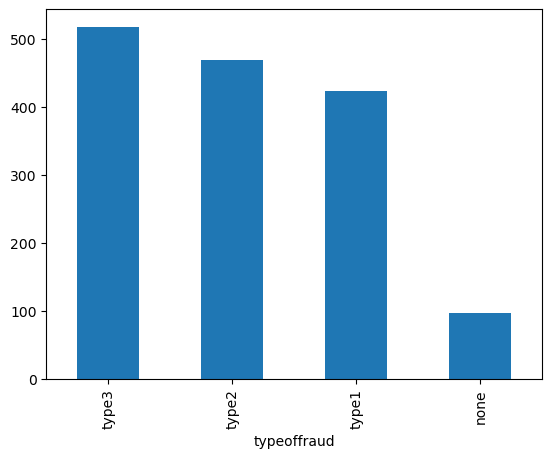

In [96]:
merged['typeoffraud'].value_counts().plot.bar()

<Axes: xlabel='typeofcrime'>

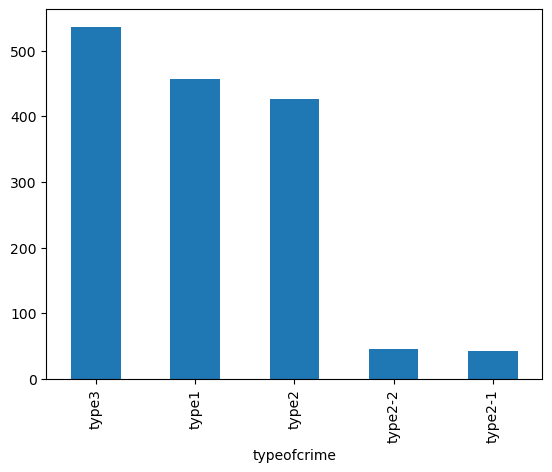

In [97]:
merged['typeofcrime'].value_counts().plot.bar()

In [98]:
sns.set_theme()
df = sns.load_dataset("penguins")

<Axes: xlabel='destinationid', ylabel='Count'>

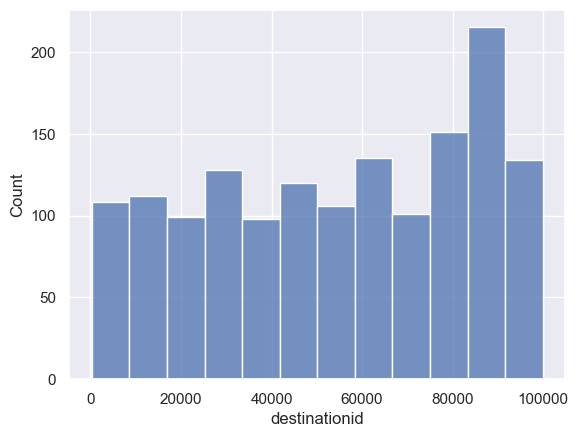

In [99]:
sns.histplot(merged["destinationid"])

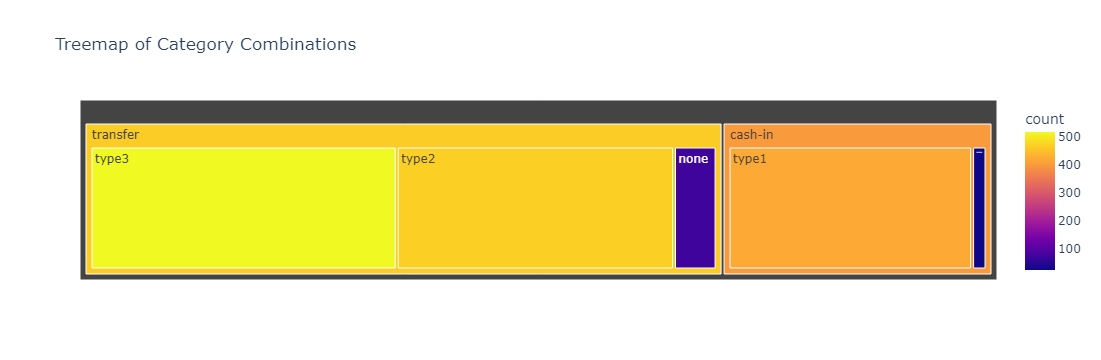

In [185]:
# Aggregate the data to get the size of each combination of categories
grouped = merged.groupby(['typeofaction', 'typeoffraud']).size().reset_index(name='count')

# Create a treemap
fig = px.treemap(
    grouped,
    path=['typeofaction', 'typeoffraud'],  # Define the hierarchical path
    values='count',  # Define the size of each rectangle
    color='count',  # Color by the count
    color_continuous_scale='Plasma',  # Color scale
    title='Treemap of Category Combinations')
fig.show()

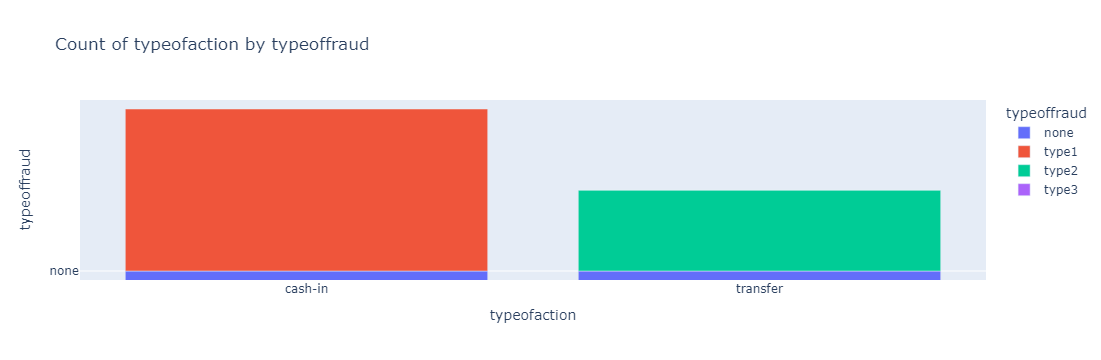

In [101]:
bar_chart_typeoffraud_typeofaction=px.bar(merged.groupby(['typeofaction', 'typeoffraud']).size().reset_index(name='count'),
                                             x="typeofaction",y="typeoffraud",color='typeoffraud',title='Count of typeofaction by typeoffraud')

bar_chart_typeoffraud_typeofaction.update_xaxes(title_text='typeofaction')
bar_chart_typeoffraud_typeofaction.update_yaxes(title_text='typeoffraud')
bar_chart_typeoffraud_typeofaction.show()

In [102]:
merged_type3=merged[merged['typeoffraud']=='type3']
merged_type3

,typeofaction,guiltyid,destinationid,amountofmoney,date,isfraud,typeoffraud,levelofcrime,typeofcrime,Date,time,year,month,quarter
892,transfer,3508,28046,328814,2019-05-01 10:40:00,1,type3,colleague,type3,2019-05-01,10:40 AM,2019,5,Q2
893,transfer,13772,28046,328814,2019-06-23 10:37:00,1,type3,colleague,type3,2019-06-23,10:37 AM,2019,6,Q2
894,transfer,75661,28046,328814,2019-03-21 10:48:00,1,type3,colleague,type3,2019-03-21,10:48 AM,2019,3,Q1
895,transfer,46526,28046,328814,2019-05-31 10:04:00,1,type3,colleague,type3,2019-05-31,10:04 AM,2019,5,Q2
896,transfer,34227,28046,328814,2019-05-11 12:32:00,1,type3,colleague,type3,2019-05-11,12:32 PM,2019,5,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,transfer,84359,95498,281507,2019-05-17 10:49:00,1,type3,colleague,type3,2019-05-17,10:49 AM,2019,5,Q2
1406,transfer,82135,95498,281507,2019-04-29 15:27:00,1,type3,colleague,type3,2019-04-29,03:27 PM,2019,4,Q2
1407,transfer,15214,95498,281507,2019-03-13 14:05:00,1,type3,colleague,type3,2019-03-13,02:05 PM,2019,3,Q1
1408,transfer,4986,95498,281507,2019-03-03 12:41:00,1,type3,colleague,type3,2019-03-03,12:41 PM,2019,3,Q1


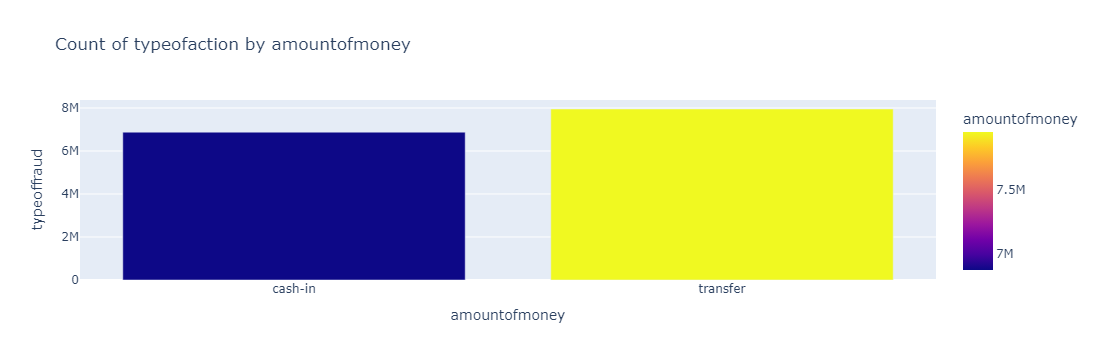

In [103]:
bar_chart_typeoffraud_amountofmoney=px.bar(merged.groupby("typeofaction")['amountofmoney'].max().reset_index(),
                                         x="typeofaction",y="amountofmoney",color="amountofmoney",title='Count of typeofaction by amountofmoney')

bar_chart_typeoffraud_amountofmoney.update_yaxes(title_text='typeoffraud')
bar_chart_typeoffraud_amountofmoney.update_xaxes(title_text='amountofmoney')
bar_chart_typeoffraud_amountofmoney.show()

In [104]:
ml2.columns

Index(['guiltyid', 'levelofcrime', 'typeofcrime'], dtype='object')

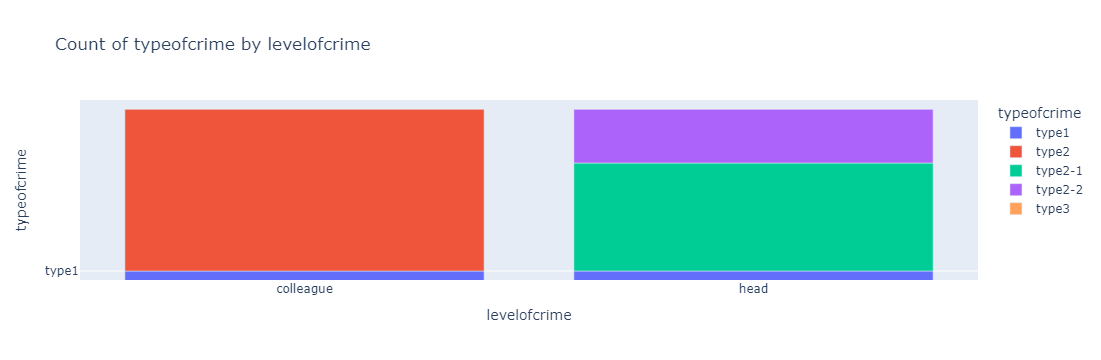

In [105]:
bar_chart_typeofcrime_levelofcrime=px.bar(merged.groupby(['typeofcrime',"levelofcrime"]).size().reset_index(name='count'),
                                         x="levelofcrime",y="typeofcrime",color="typeofcrime",title='Count of typeofcrime by levelofcrime')

bar_chart_typeofcrime_levelofcrime.update_yaxes(title_text='typeofcrime')
bar_chart_typeofcrime_levelofcrime.update_xaxes(title_text='levelofcrime')
bar_chart_typeofcrime_levelofcrime.show()

In [106]:
merged.to_csv('money_data.csv', index=False)

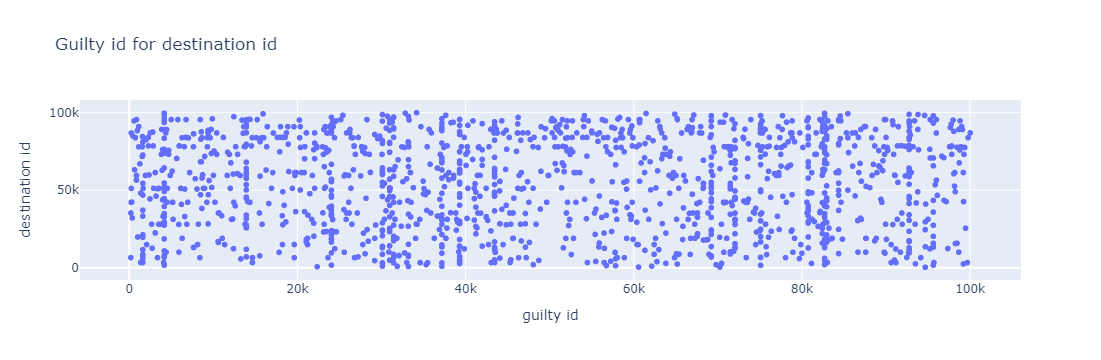

In [107]:
guiltyid_dest_id=px.scatter(merged,x='guiltyid',y='destinationid', title ='Guilty id for destination id ')

guiltyid_dest_id.update_xaxes(title_text = 'guilty id')
guiltyid_dest_id.update_yaxes(title_text = 'destination id')

guiltyid_dest_id.show()